In [73]:
import pandas as pd
import numpy as np

## 1. Process dataframe

In [74]:
countries_QDP_df = pd.read_csv('datasets/countries_GDP.csv', encoding = "ISO-8859-1").head(202)

columns_to_keep = ["Unnamed: 3", "Unnamed: 4"]
countries_QDP_df = countries_QDP_df[columns_to_keep]
countries_QDP_df.rename(columns={'Unnamed: 3': 'country', 'Unnamed: 4': 'gdp'}, inplace=True)
countries_QDP_df.drop([0,1,2,3], axis=0, inplace=True)
countries_QDP_df = countries_QDP_df.reset_index(drop=True)

countries_QDP_df['gdp'] = countries_QDP_df['gdp'].str.replace(',', '')
countries_QDP_df['gdp'] = countries_QDP_df['gdp'].str.replace(' ', '')


In [75]:
# Get colonized list and colonizer list
colonized_df = pd.read_csv('datasets/colonies_wikipedia.csv')
colonized_countries = list(colonized_df["colonized_country"])
colonizer_countries = list(colonized_df["colonizer_country"].value_counts().keys())

year = 1945

In [76]:
def get_colonized_gdp_by_colonizer(countries_QDP_df):
    for index in range(len(countries_QDP_df)):
        country = countries_QDP_df.get_value(index,'country')
        if country in colonized_countries:
            indep_year = colonized_df.loc[colonized_df['colonized_country'] == country, 'Year'].values[0]

            if indep_year > 1940:
                
                colonizer_country = colonized_df.loc[colonized_df['colonized_country'] == country, 'colonizer_country'].values[0]

                country_gdp = countries_QDP_df.get_value(index,'gdp')
                
                #if colonizer_country == 'United Kingdom':
                #    print(country, country_gdp)
                colonizer_countries_gdp[colonizer_country] = colonizer_countries_gdp[colonizer_country] + int(country_gdp)

                countries_QDP_df.set_value(index, 'colonizer_country', colonizer_country) 
        else:
            countries_QDP_df = countries_QDP_df.drop(index, axis=0)

    countries_QDP_df = countries_QDP_df.reset_index(drop=True)
    
    return colonizer_countries_gdp, countries_QDP_df

In [77]:
# Create dict for colonizer 
colonizer_countries_gdp = {key: 0 for key in colonizer_countries}
colonizer_countries_gdp, countries_QDP_df = get_colonized_gdp_by_colonizer(countries_QDP_df)

nb_colonies = colonized_df.groupby("colonizer_country").count()

for index in range(len(nb_colonies)):
    colonizer = nb_colonies.index[index]
    nb = nb_colonies['colonized_country'][index]
    colonizer_countries_gdp[colonizer] = colonizer_countries_gdp[colonizer]/nb

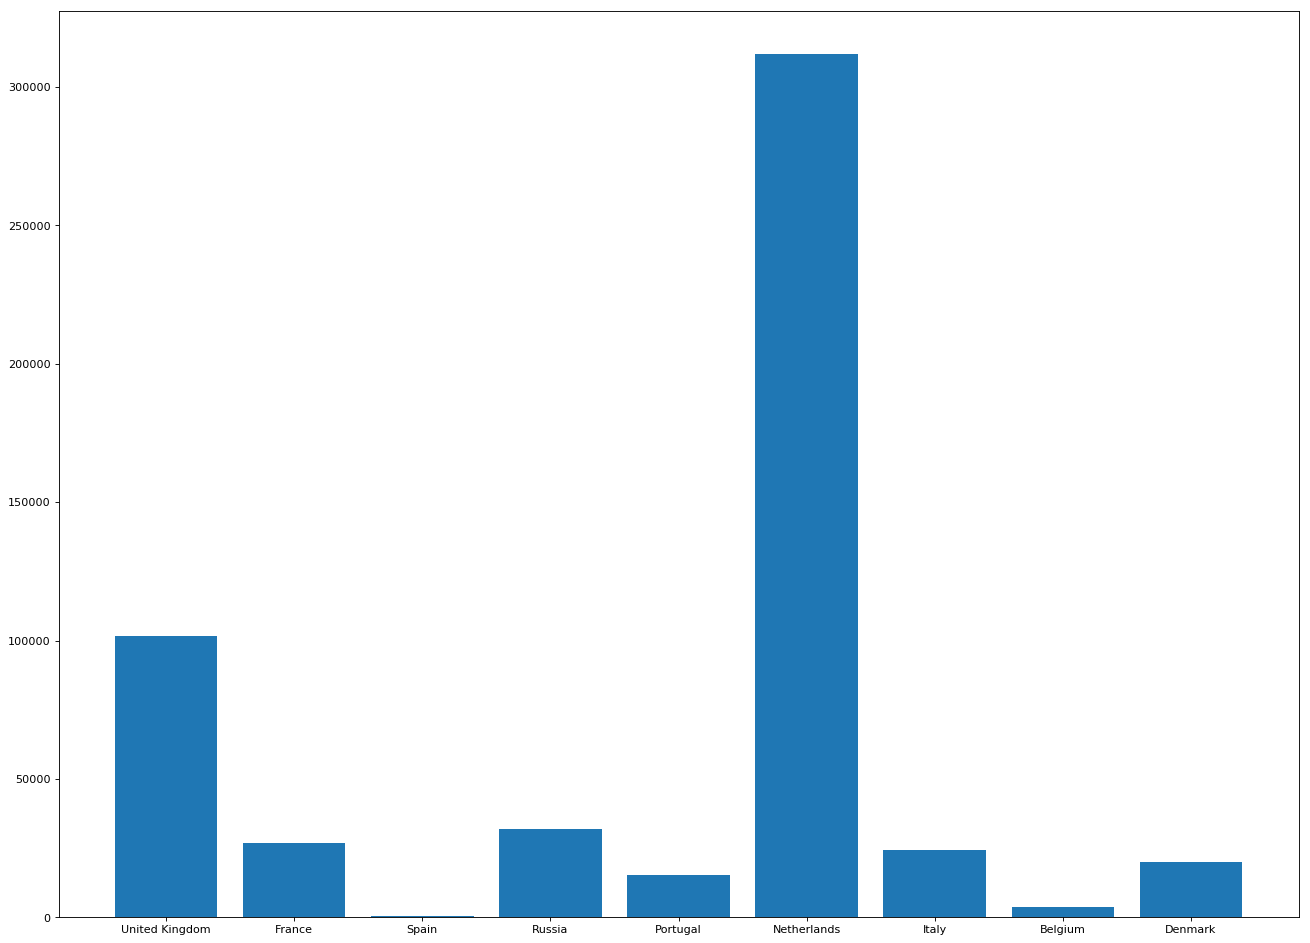

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(range(len(colonizer_countries_gdp)), list(colonizer_countries_gdp.values()), align='center')
plt.xticks(range(len(colonizer_countries_gdp)), list(colonizer_countries_gdp.keys()))
plt.show()